In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import csv
import cv2
import matplotlib.pyplot as plt

In [2]:
# Reading files
def get_image_from_sourcepath(source_path, folder):
    filename = source_path.split('/')[-1]
    current_path = './{}/{}/{}'.format(dataPath,folder,filename)
    image = cv2.imread(current_path)
    return image

def read_lines_from_filename(filename):
    local_lines = []
    with open('./{}/{}'.format(dataPath, filename)) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            local_lines.append(line)
    return local_lines

In [3]:
dataPath = 'exampleData'
driving_log_list = {
    'driving_log.csv':'IMG'
}

In [18]:
images = []
measurements = []

# lines: array that contains each row of the csv file
# line: row that contains the image path for images, and also the steering and throttle values associated.
# images: global array that contains all the images used to train the model as the input
# measurements: global array that contains all measurements used to train the model as the output
# correction: a parameter that needs to be tuned. It provides a correction in the scenario when the car sees the lane lines.
print('Reading from: ./{}/'.format(dataPath))
for (d_log, folder) in driving_log_list.items():
    print('Reading file: {}'.format(d_log))
    lines = read_lines_from_filename(d_log)

    for line in lines:
        image_center = get_image_from_sourcepath(line[0], folder)
        
        steering_center = float(line[3])
        
        images.append(image_center)
        measurements.append(steering_center)

Reading from: ./exampleData/
Reading file: driving_log.csv


In [19]:
imagesArray = np.array(images)
measurementsArray = np.array(measurements)

In [20]:
imagesArray.shape

(3, 160, 320, 3)

In [21]:
measurementsArray.shape

(3,)

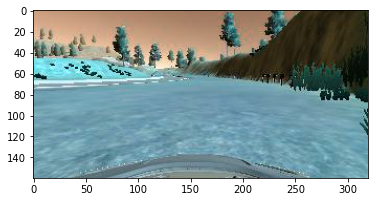

In [28]:
plt.imshow(imagesArray[0])

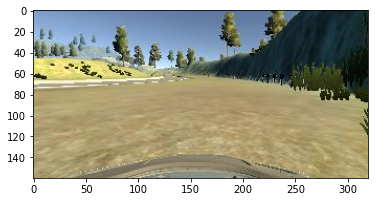

In [30]:
plt.imshow(cv2.cvtColor(imagesArray[0], cv2.COLOR_BGR2RGB))

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda, Conv2D, MaxPool2D, Cropping2D, Dropout
from tensorflow.keras.layers import Convolution2D

# model = keras.Sequential()
# model.add(keras.Input(shape=(160, 320, 3)))
# model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
# model.add(layers.Conv2D(32, 3, activation="relu"))
# model.add(layers.MaxPooling2D(3))
# model.add(layers.Flatten())

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(filters=36, kernel_size=(5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(filters=48, kernel_size=(3, 3), strides=(2,2), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(2,2), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d (Cropping2D)      (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 38, 48)         15600     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 18, 64)         27712     
_________________________________________________________________
dropout (Dropout)            (None, 2, 18, 64)        

In [1]:
X_train = imagesArray
Y_train = measurementsArray

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train, Y_train, validation_split = 0.2, shuffle = True, epochs=1)